<a href="https://colab.research.google.com/github/Maria-Paula05/Laboratorio-Procesamiento-Digital-de-Se-ales/blob/main/Python1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis Estadístico De Señales**



Las señales biomédicas muestran la actividad fisiológica del cuerpo que a su vez contienen información clave, como su amplitud y frecuencia. Sin embargo, al ser capturada en entornos reales, suelen estar acompañadas de ruido, lo que puede afectar su análisis e interpretación.

Para el análisis de estas señales, además de examinar sus variaciones en el tiempo y la frecuencia, es útil calcular ciertos parámetros estadísticos que nos permiten describir su comportamiento y detectar patrones relevantes. En este repositorio se busca proporcionar una metodología para la descarga, procesamiento y análisis de señales fisiológicas, enfocándose en el cálculo de estadísticos descriptivos y la evaluación de la relación señal-ruido (SNR) bajo diferentes condiciones de ruido.

#**1. Descarga y Selección de la Señal**

Se descargó previemente una señal fisiológica desde la base de datos de Physionet. Se seleccionó una señal de electrocardiograma (ECG) con una duración suficiente para el cálculo de dichos parámetros estadísticos.

#**2. Importación y Graficación de la Señal**

La señal fue importada en Python a través de archivos .dat y .hea también fue visualizada mediante la librería matplotlib. Se puede observar que la señal presenta variaciones típicas de un ECG, incluyendo ondas P, complejos QRS y ondas T.

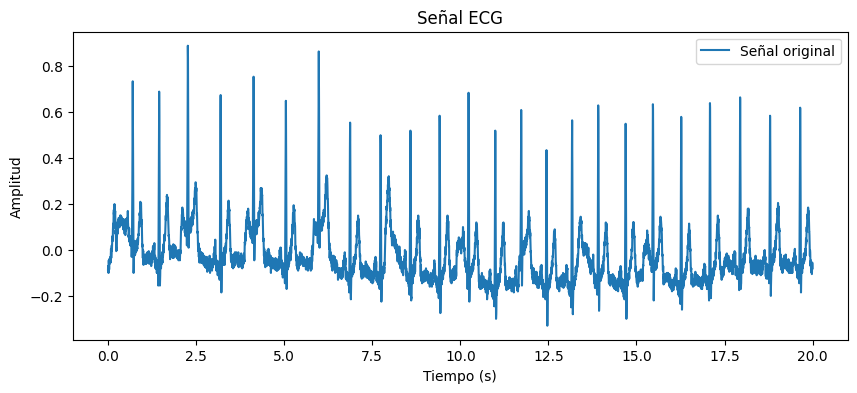

In [ ]:
record = wfdb.rdrecord("rec_1")
signal = record.p_signal[:, 0]  # Tomar la primera señal
fs = record.fs  # Frecuencia de muestreo
time = np.arange(len(signal)) / fs # Arreglo de tiempo que tiene la misma longitud que la señal

plt.figure(figsize=(10, 4))
plt.plot(time, signal, label="Señal original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal ECG")
plt.legend()
plt.show()

#**3. Cálculo de estadísticas descriptivas**

Se calcularon los siguientes estadísticos de la señal, primero usando las fórmulas matemáticas y luego con funciones predefinidas de Python.

**a) Media de la Señal**

Representa el valor promedio de la señal, indicando su nivel base. En esta señal de ECG, ayuda a detectar desviaciones anormales en la actividad fisiológica.


In [ ]:
suma_signal = 0
n = len(signal)

for x in signal:
    suma_signal += x

mean_signal = suma_signal / n
print(f"Media de la señal: {mean_signal:.4f}")


Media de la señal: -0.0240


*Usando librerias de Python:*

In [ ]:
mean_signal = np.mean(signal)
print(f"Media de la señal: {mean_signal:.4f}")

Media de la señal: -0.0240


**b) Desviación Estándar**

Mide cuánto varían los valores de la señal respecto a la media. Un valor alto indica una señal con fluctuaciones pronunciadas, lo que nos puede ayudar en este caso a identificar irregularidades en el ritmo cardíaco.

In [ ]:
sumatoria_varianza = 0

for x in signal:
    sumatoria_varianza += (x - mean_signal) ** 2

std_signal = (sumatoria_varianza / n) ** 0.5
print(f"Desviación estándar de la señal: {std_signal:.4f}")


Desviación estándar de la señal: 0.1294


*Usando librerias de Python:*

In [ ]:
std_signal = np.std(signal)
print(f"Desviación estándar: {std_signal:.4f}")

Desviación estándar: 0.1294


**c) Coeficiente de Variación**

Relaciona la desviación estándar con la media en porcentaje, permitiendo comparar la variabilidad entre diferentes señales sin importar la escala de amplitud.

In [ ]:
cv_signal = (std_signal / mean_signal) * 100
print(f"Coeficiente de variación de la señal: {cv_signal:.4f}%")


Coeficiente de variación de la señal: -538.9182%


*Usando librerias de Python:*

In [ ]:
cv_signal = variation(signal)
print(f"Coeficiente de variación: {cv_signal:.4f}")

Coeficiente de variación: -5.3892


**d) Histograma**

Muestra la distribución de los valores de la señal. Es útil para visualizar qué rangos de amplitud son más frecuentes y detectar patrones o anomalías.

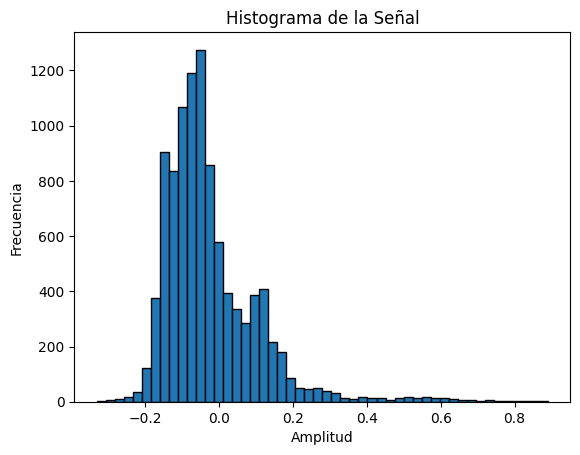

In [ ]:
frequencies = {}

for value in signal:
    if value in frequencies:
        frequencies[value] += 1
    else:
        frequencies[value] = 1

plt.hist(signal, bins=50, edgecolor='black')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Señal')
plt.show()

*Usando librerias de Python:*

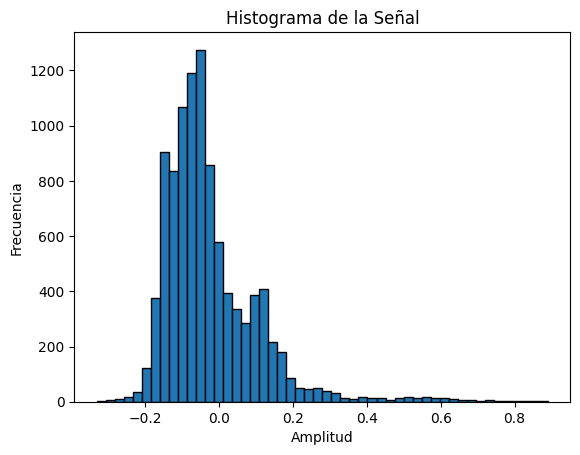

In [ ]:
plt.hist(signal, bins=50, edgecolor='black')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Señal')
plt.show()

**e) Función de probabilidad**

Describe la probabilidad de que la señal tome ciertos valores. Se usa para modelar el comportamiento de la señal y analizar si sigue una distribución normal o tiene tendencias atípicas.

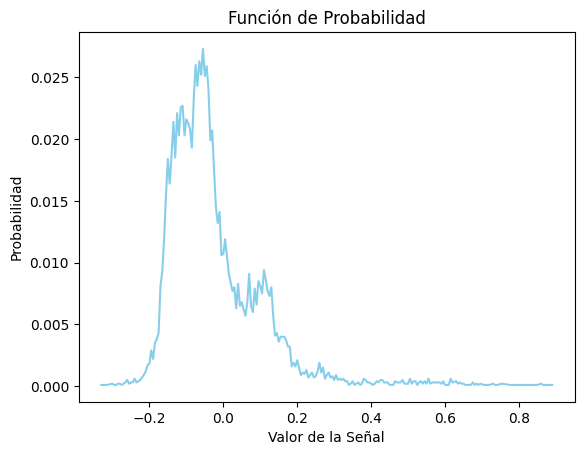

In [ ]:
frequencies = {}
for value in signal:
    if value in frequencies:
        frequencies[value] += 1
    else:
        frequencies[value] = 1

total_samples = len(signal)
probabilities = {key: value / total_samples for key, value in frequencies.items()}

x_values = sorted(probabilities.keys())
y_values = [probabilities[key] for key in x_values]

plt.plot(x_values, y_values, linestyle='-', color='skyblue')
plt.xlabel('Valor de la Señal')
plt.ylabel('Probabilidad')
plt.title('Función de Probabilidad')
plt.show()

*Usando librerias de Python:*

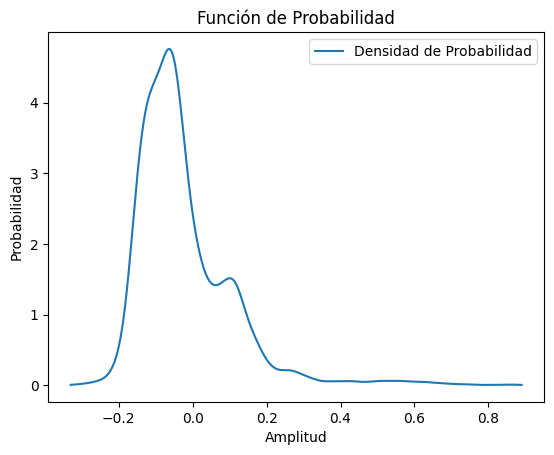

In [ ]:
from scipy.stats import gaussian_kde

densidad = gaussian_kde(signal)
x_vals = np.linspace(min(signal), max(signal), 1000)
y_vals = densidad(x_vals)

plt.plot(x_vals, y_vals, label='Densidad de Probabilidad')
plt.xlabel('Amplitud')
plt.ylabel('Probabilidad')
plt.title('Función de Probabilidad')
plt.legend()
plt.show()

#**4. Relación Señal-Ruido (SNR)**

La relación señal-ruido (SNR) es la medida de la diferencia entre la señal deseada y el ruido no deseado. Se expresa en decibelios (dB).

Se introdujeron diferentes tipos de ruido y se calculó el SNR para cada caso:


**a) Ruido Gaussiano**

El ruido gaussiano es un ruido estadístico con una distribución gaussiana (normal). Esto significa que los valores del ruido se distribuyen de forma gaussiana normal.

Se añadió a la señal original ruido gaussiano y el SNR fue:

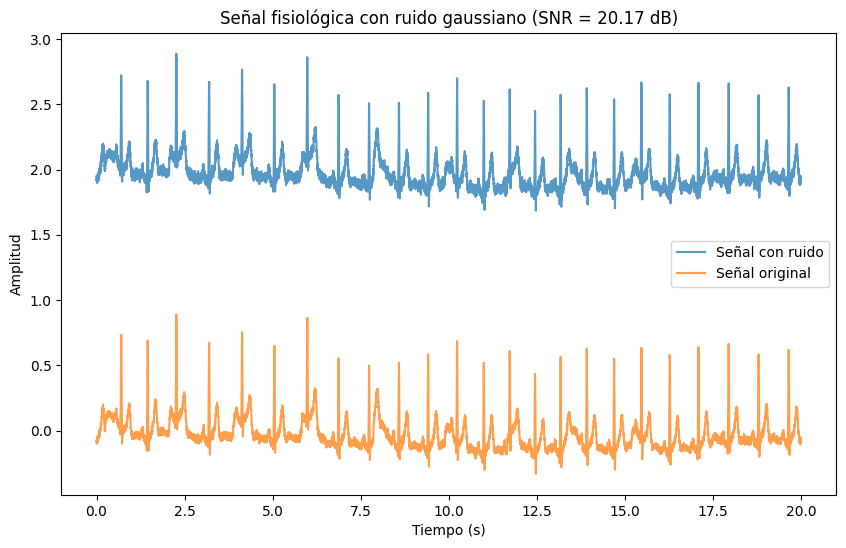

SNR: 20.17 dB


In [ ]:
noise_std = 0.1 * np.std(signal)  # Ajusta la desviación estándar del ruido
noise = np.random.normal(0, noise_std, size=len(signal))  # Ruido gaussiano

# Contaminar la señal original sumándole el ruido generado
noisy_signal = signal + noise  # Contaminación con ruido

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Separación vertical:
offset = 2
noisy_signal_shifted = noisy_signal + offset

# Graficar la señal original y la señal con ruido (separadas verticalmente)
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_signal_shifted, label="Señal con ruido", alpha=0.75)
plt.plot(time, signal, label="Señal original", alpha=0.75)

plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal fisiológica con ruido gaussiano (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

print(f"SNR: {snr_db:.2f} dB")


**Este mismo ruido fue amplificado y el resultado fue el siguiente:**

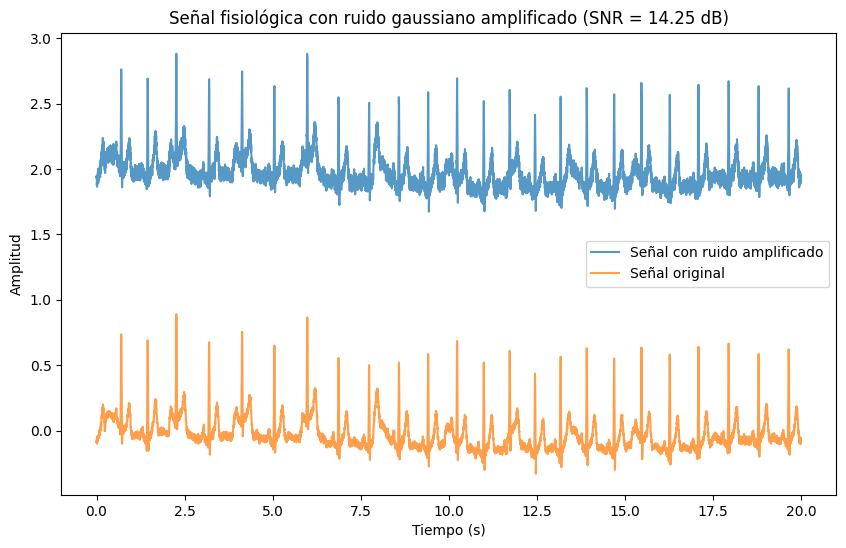

SNR: 14.25 dB


In [ ]:
noise_std = 0.1 * np.std(signal)  # Ajusta la desviación estándar del ruido
noise = 2 * (np.random.normal(0, noise_std, size=len(signal)))  # Ruido gaussiano

noisy_signal = signal + noise  # Contaminación con ruido amplificado

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2) # Calcular la relación señal a ruido (SNR) en dB
noise_power = np.mean(noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Separación vertical:
offset = 2  # Ajusta el espacio vertical entre las señales
noisy_signal_shifted = noisy_signal + offset


# Graficar la señal original y la señal con ruido (separadas verticalmente, alpha=0.75 en ambas)
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_signal_shifted, label="Señal con ruido amplificado", alpha=0.75)
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal fisiológica con ruido gaussiano amplificado (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

print(f"SNR: {snr_db:.2f} dB")


**b) Ruido Impulso**

¿Qué es el ruido impulso?

El ruido de impulso se caracteriza por sonidos de corta duración y una presión sonora que aumenta rápidamente. Según ISO 1996-1:2006, es «un sonido caracterizado por picos repentinos y de corta duración en la presión del sonido (la duración de un solo impulso de sonido suele ser inferior a 1 segundo)».

En esta práctica se  introdujeron picos de ruido tipo impulso y se calculó su SNR:

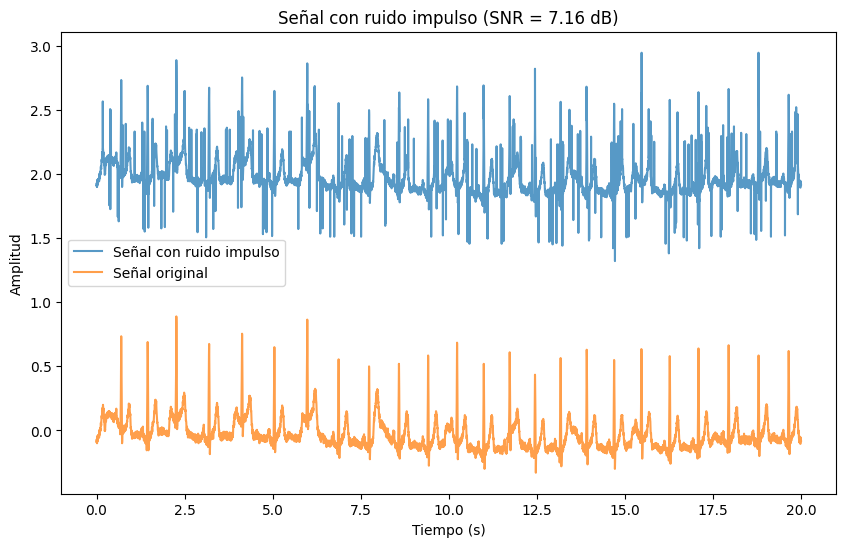

SNR: 7.16 dB


In [ ]:
# Parámetros del ruido impulso
impulse_prob = 0.02
impulse_magnitude = 3 * np.std(signal)

# Generar ruido impulso
impulse_noise = np.zeros_like(signal)
impulse_indices = np.random.rand(len(signal)) < impulse_prob
impulse_noise[impulse_indices] = np.random.choice([-impulse_magnitude, impulse_magnitude], size=np.sum(impulse_indices))

# Contaminar la señal con el ruido impulso
noisy_signal = signal + impulse_noise

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(impulse_noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Separación vertical
offset = 2
noisy_signal_shifted = noisy_signal + offset

# Graficar la señal original y la señal con ruido impulso (separadas verticalmente)
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_signal_shifted, label="Señal con ruido impulso", alpha=0.75)
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal con ruido impulso (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

print(f"SNR: {snr_db:.2f} dB")

**Este mismo ruido fue amplificado y el resultado fue el siguiente:**

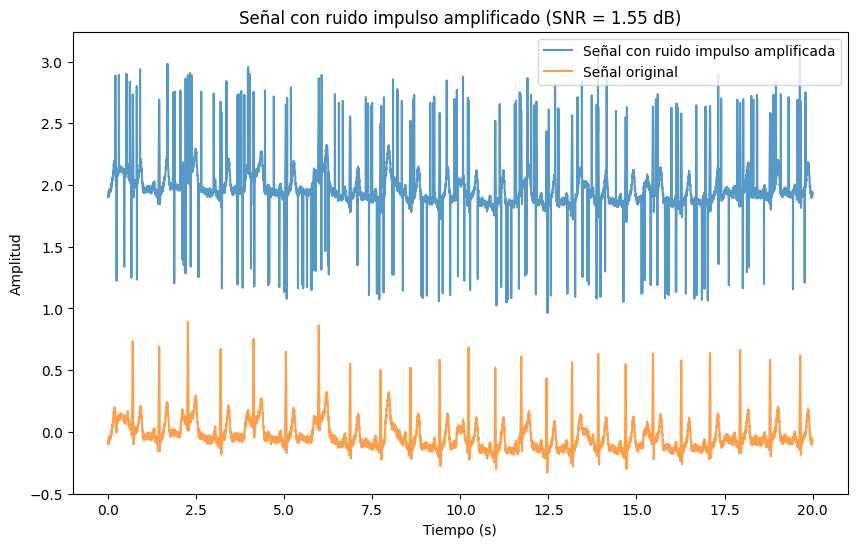

SNR: 1.55 dB


In [ ]:
# Parámetros del ruido impulso
impulse_prob = 0.02
impulse_magnitude = 2 * (3 * np.std(signal))  # Amplitud de los impulsos

# Generar ruido impulso
impulse_noise = np.zeros_like(signal)
impulse_indices = np.random.rand(len(signal)) < impulse_prob  # Seleccionar posiciones de impulsos
impulse_noise[impulse_indices] = np.random.choice([-impulse_magnitude, impulse_magnitude], size=np.sum(impulse_indices))

# Contaminar la señal con el ruido impulso
noisy_signal = signal + impulse_noise

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(impulse_noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Separación vertical:
offset = 2  # Adjust vertical space as needed
noisy_signal_shifted = noisy_signal + offset

# Graficar la señal original y la señal con ruido impulso
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_signal_shifted, label="Señal con ruido impulso amplificada", alpha=0.75)
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal con ruido impulso amplificado (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

print(f"SNR: {snr_db:.2f} dB")

**c) Ruido Tipo Artefacto**


Un ruido tipo artefacto es un tipo de interferencia o contaminación en una señal que no proviene de fuentes de ruido aleatorio (como el ruido térmico o gaussiano), sino de eventos externos, problemas en el sistema de adquisición, o elementos específicos del entorno.

Se generaron variaciones anormales simulando artefactos y el SNR fue:

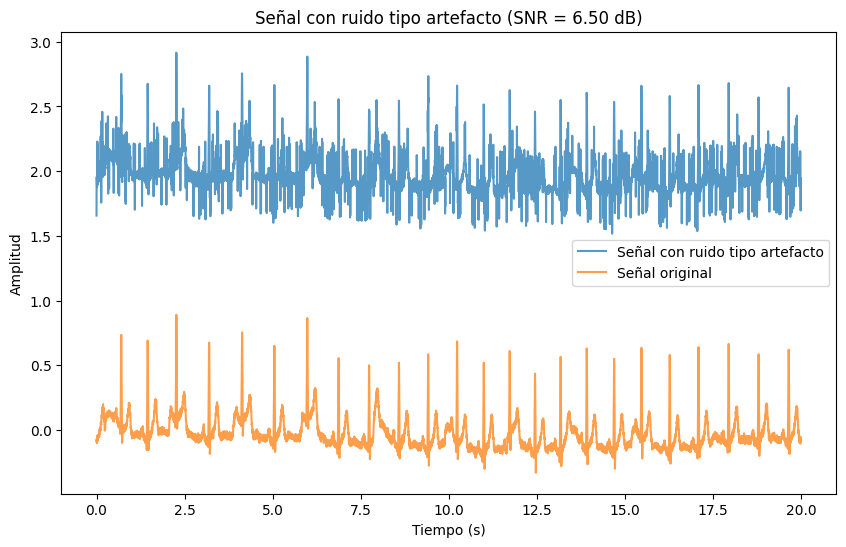

SNR: 6.50 dB


In [ ]:
# Parámetros del ruido tipo artefacto
powerline_freq = 50
artifact_prob = 0.05
artifact_magnitude = 2 * np.std(signal)  # Magnitud de los artefactos

time = np.arange(len(signal)) / fs
powerline_noise = 0.2 * np.std(signal) * np.sin(2 * np.pi * powerline_freq * time)

# Generar artefactos transitorios en posiciones aleatorias
artifact_noise = np.zeros_like(signal)
artifact_indices = np.random.rand(len(signal)) < artifact_prob
artifact_noise[artifact_indices] = np.random.choice([-artifact_magnitude, artifact_magnitude], size=np.sum(artifact_indices))

# Ruido total = interferencia de línea + artefactos
total_noise = powerline_noise + artifact_noise

# Contaminar la señal con el ruido tipo artefacto
noisy_signal = signal + total_noise

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(total_noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Separación vertical:
offset = 2
noisy_signal_shifted = noisy_signal + offset

# Graficar la señal original y la señal contaminada
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_signal_shifted, label="Señal con ruido tipo artefacto", alpha=0.75)
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal con ruido tipo artefacto (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

print(f"SNR: {snr_db:.2f} dB")

**Este mismo ruido fue amplificado y el resultado fue el siguiente:**

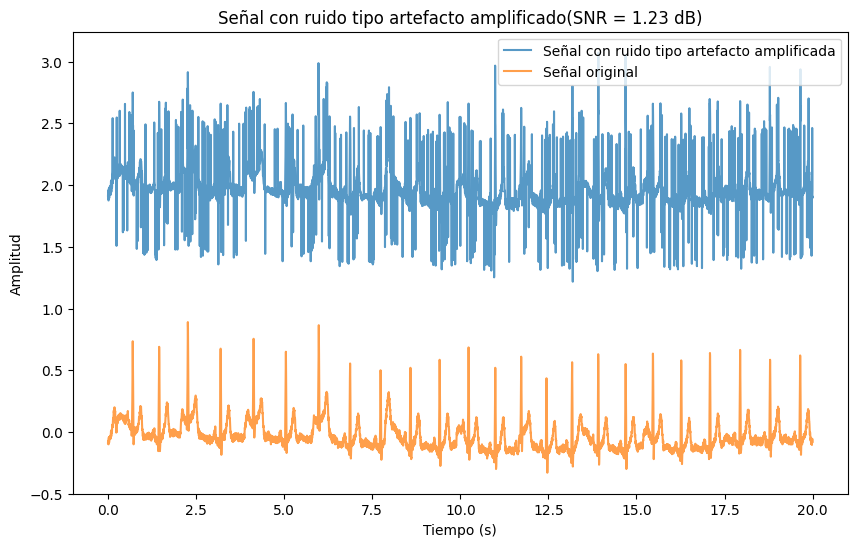

SNR: 1.23 dB


In [ ]:
# Parámetros del ruido tipo artefacto
powerline_freq = 50  # Frecuencia de interferencia de línea eléctrica (puede ser 60 Hz en algunos países)
artifact_prob = 0.05  # Probabilidad de aparición de artefactos transitorios
artifact_magnitude = 2 * (2 * np.std(signal))  # Magnitud de los artefactos

time = np.arange(len(signal)) / fs
powerline_noise = 0.2 * np.std(signal) * np.sin(2 * np.pi * powerline_freq * time)

# Generar artefactos transitorios en posiciones aleatorias
artifact_noise = np.zeros_like(signal)
artifact_indices = np.random.rand(len(signal)) < artifact_prob
artifact_noise[artifact_indices] = np.random.choice([-artifact_magnitude, artifact_magnitude], size=np.sum(artifact_indices))

# Ruido total = interferencia de línea + artefactos
total_noise = powerline_noise + artifact_noise

# Contaminar la señal con el ruido tipo artefacto
noisy_signal = signal + total_noise

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(total_noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Separación vertical:
offset = 2  # Adjust vertical space as needed
noisy_signal_shifted = noisy_signal + offset


# Graficar la señal original y la señal contaminada
plt.figure(figsize=(10, 6))  # Increased figure size
plt.plot(time, noisy_signal_shifted, label="Señal con ruido tipo artefacto amplificada", alpha=0.75)
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal con ruido tipo artefacto amplificado(SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

# Imprimir la SNR
print(f"SNR: {snr_db:.2f} dB")

#**Ruido normal vs Ruido amplificado**




1.El valor de SNR en el normal es más alto y en el amplificado es más bajo ya que
la potencia del ruido aumenta.







In [ ]:
snr_db = 10 * np.log10(signal_power / noise_power)

Cuando se amplifica el ruido se aumenta la Potencia de ruido por un factor, en
este caso 2; esto provoca que el denominador de la fórmula sea mayor; al aumentar este denominador el resultado de la división disminuye y finalmente como el SNR está en escala logaritmica una disminución en esta relación implica una disminución en dB.


2.Impacto en la señal:en la señal original se distingue de forma clara el ruido y la señal no pierde detalles importantes mientrás que en la señal  amplificada más el ruido es más dominante, dificultando la identificación de los detalles originales de la señal.Si el SNR es demasiado bajo, la señal puede perderse completamente en el ruido


#**Análisis**

- El código carga una señal ECG y realiza un análisis estadístico inicial, calculando la media y el histograma de amplitudes para comprender la distribución de la señal. Este análisis proporciona una base para evaluar cómo los diferentes tipos de ruido afectan la señal.
-  En cuanto a la función de probabilidad se puede analizar que hay un pico
pronunciado en valores cercanos a 0 , lo que indica que la mayoría de valores de la selal están alrededor de este rango,los valores decrecen rápidamente hacía los lados , pero hay un lado más largo hacía la derecha lo que indica una distribución sesgada a la derecha.

- Se introduce ruido gaussiano estándar, ajustando su desviación estándar según la señal original. Se calcula la relación señal a ruido (SNR) en dB para medir el impacto del ruido sobre la calidad de la señal, comparando la señal original con la señal ruidosa.

- El ruido gaussiano se amplifica, incrementando su magnitud y reduciendo el SNR. Esto hace que el ruido se vuelva más dominante y degrade significativamente la señal, lo que resulta en un SNR más bajo que el de la señal con ruido estándar.

- Se introduce ruido de tipo impulso, que se caracteriza por picos repentinos de gran amplitud en posiciones aleatorias. Este ruido no sigue una distribución normal y genera un SNR intermedio, dependiendo de la probabilidad y la magnitud de los impulsos, afectando la señal de manera esporádica.

- Se amplifican la interferencia de línea eléctrica y los artefactos transitorios, lo que aumenta su magnitud y degrada aún más la señal. Esta amplificación provoca una mayor dominancia del ruido sobre la señal original, reduciendo significativamente el SNR y reflejando la dificultad de recuperar la señal cuando las interferencias son intensas.

#**Conclusiones**



*   Se logró identificar los estadísticos que describen una señal biomédica a partir de algoritmos de programación en el lenguaje Phyton.
*   Gracias a la estadistica descriptiva se logró resumir los datos de la señal de una manera sencilla y clara para la interpretación por medio de varios calculoscomo lo fueron: media, desviación estandar, coeficiente de variación, histograma y función de probabilidad los cuales nos indican que los datos tienen una distribución sesgada a la derecha.
*   En cuanto a los datos obtenidos se  concluye que el  SNR con ruido gaussiano estándar presenta un valor relativamente alto, mientras que el SNR con ruido amplificado muestra un valor más bajo debido a la mayor magnitud del ruido. En otros tipos de ruido, como el ruido de tipo impulso o el ruido tipo artefacto, el SNR puede tener valores intermedios que dependen de factores como la probabilidad de impulsos, la magnitud de los impulsos, la interferencia y los artefactos presentes. Sin embargo, el SNR con ruido tipo artefacto amplificado será el más bajo, ya que la amplificación de los artefactos hace que el ruido se vuelva aún más dominante, dificultando aún más la recuperación de la señal original.





#**Referencias**
López, J. F. (2024, May 10). ¿Qué significa la media (estadística) y cómo se calcula? Economipedia. https://economipedia.com/definiciones/media.html

Ortega, C. (2024, June 6). Desviación estándar: Qué es, usos y cómo obtenerla. QuestionPro. https://www.questionpro.com/blog/es/desviacion-estandar/

Sanjuán, F. J. M. (2024, February 22). Coeficiente de variación- Descubre qué es, sus usos y algunos ejemplos. Economipedia. https://economipedia.com/definiciones/coeficiente-de-variacion.html

Equipo editorial, Etecé. (2024, October 23). Histograma - Concepto, tipos, ejemplos y cómo crearlos. Concepto. https://concepto.de/histograma/

Función de probabilidad y de distribución | StudySmarter. (n.d.). StudySmarter ES. https://www.studysmarter.es/resumenes/matematicas/estadistica-y-probabilidad/funcion-de-probabilidad-y-de-distribucion/

Qué es Señal-Ruido. Diccionario Médico. Clínica U. Navarra. (n.d.). https://www.cun.es. https://www.cun.es/diccionario-medico/terminos/senal-ruido

Gaussian Noise. (n.d.). CloudFactory Computer Vision Wiki. Retrieved February 5, 2025, from https://wiki-cloudfactory-com.translate.goog/docs/mp-wiki/augmentations/gaussian-noise?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl

Ruido de Impulso. (2023, June 28). SVANTEK - Sound and Vibration; Svantek. https://svantek.com/es/servicios/ruido-de-impulso/

